# Q3

In [ ]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from skimage import color

In [ ]:
image = cv2.imread('face.jpg')[:,:,::-1]

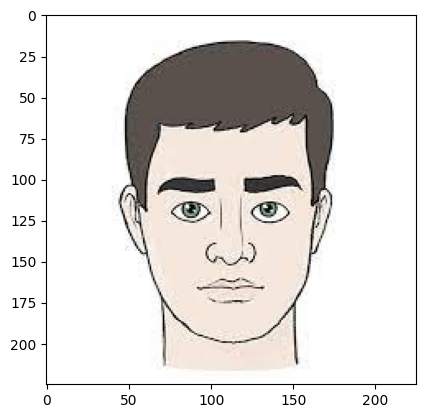

In [ ]:
plt.imshow(image)

In [ ]:
def segment(image):
    ### 

    #shape of the image
    x = image.shape[0]
    y = image.shape[1]
    segmented_image = np.zeros((x , y , 3))

    #visited for dfs
    visited = np.zeros((x , y))
    stack = []

    #segmentation nodes
    first_node =  [(140 , 111) , (138 , 163) , (138 , 56) , (210 ,110)]
    my_node =  [(140 , 111) , (138 , 163) , (138 , 56) , (210 , 110)]

    #threshhold for convertion of image to binary
    treshhold = [18, 65 , 30 , 20]

    for i in range(4):

      image = np.float64(image)

      #zero out the pixels with the same color
      my_image = np.abs(image - image[my_node[i][0]][my_node[i][1]])

      #convert to gray scale
      my_image = cv2.cvtColor(my_image.astype('uint8') , cv2.COLOR_BGR2GRAY)

      #convert to binary(0 or 1)
      _ , my_image = cv2.threshold(my_image,treshhold[i],255,cv2.THRESH_BINARY) 
      stack.append(my_node[i])
      
      #dfs on the segmented points
      while(True):
        if len(stack) <= 0 :
          break
      
        first_node = stack[-1]
        stack.pop()

        #color the node 
        if (visited[first_node[0]][first_node[1]] == 0):
            visited[first_node[0]][first_node[1]] = 1
            segmented_image[first_node[0]][first_node[1]] = (255 ,  115 , 100)

        # go throw all 8 neighbors of the segmented pixels
        # if they are not visited in dfs and have the near color to the segment (wich are 0)
        # add them to the stack of dfs
        node = ((first_node[0] + 1) % x , first_node[1] % y)
        if (visited[node[0]][node[1]] == 0 and my_image[node[0]][node[1]] == 0):
            stack.append(node)
        
        node = ((first_node[0] - 1) % x , first_node[1] % y)
        if (visited[node[0]][node[1]] == 0 and my_image[node[0]][node[1]] == 0):
            stack.append(node)
        
        node = (first_node[0] % x , (first_node[1] + 1) % y)
        if (visited[node[0]][node[1]] == 0 and my_image[node[0]][node[1]] == 0):
            stack.append(node)
        
        node = (first_node[0]  % x , (first_node[1] - 1) % y)
        if (visited[node[0]][node[1]] == 0 and my_image[node[0]][node[1]] == 0):
            stack.append(node)
        
        node = ((first_node[0] + 1) % x , (first_node[1] + 1) % y)
        if (visited[node[0]][node[1]] == 0 and my_image[node[0]][node[1]] == 0):
            stack.append(node)
        
        node = ((first_node[0] + 1) % x , (first_node[1] - 1) % y)
        if (visited[node[0]][node[1]] == 0 and my_image[node[0]][node[1]] == 0):
            stack.append(node)
        
        node = ((first_node[0] - 1) % x , (first_node[1] - 1) % y)
        if (visited[node[0]][node[1]] == 0 and my_image[node[0]][node[1]] == 0):
            stack.append(node)

        node = ((first_node[0] - 1) % x , (first_node[1] + 1) % y)
        if (visited[node[0]][node[1]] == 0 and my_image[node[0]][node[1]] == 0):
            stack.append(node)
    
    # make the segmented image
    for i in range(x):
      for j in range(y):
        if segmented_image[i][j].any() == 0:
          segmented_image[i][j] = image[i][j]
    ### 
    return segmented_image

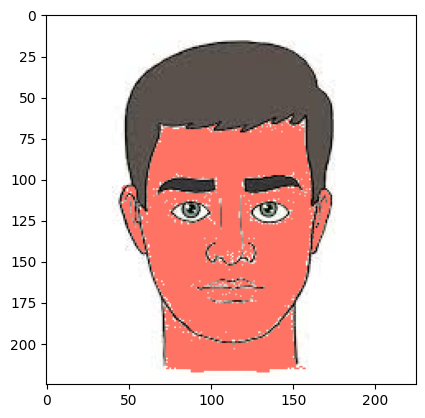

In [ ]:
segmented_image = segment(image)
plt.imshow(segmented_image.astype('uint8'))